In [1]:
import numpy as np
import pandas as pd
import os
import sys
import time
import importlib
import autograd.numpy as ag_np
import autograd
import itertools
from train_valid_test_loader import load_train_valid_test_datasets
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem


In [2]:
import sklearn.linear_model
import sklearn.pipeline
import sklearn.metrics
from sklearn.model_selection import GridSearchCV


In [3]:
# Plotting utils
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [4]:
train_data_tuple, valid_data_tuple, test_data_tuple, total_n_users, total_n_items = load_train_valid_test_datasets()


epoch       0.000 | loss_total     0.00318 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00200 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00295 | train_MAE     0.99592 | valid_MAE     1.00073 | grad_wrt_mu     0.00157 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00301 | train_MAE     0.99066 | valid_MAE     0.99503 | grad_wrt_mu     0.00186 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00257 | train_MAE     0.98445 | valid_MAE     0.98828 | grad_wrt_mu     0.00145 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00263 | train_MAE     0

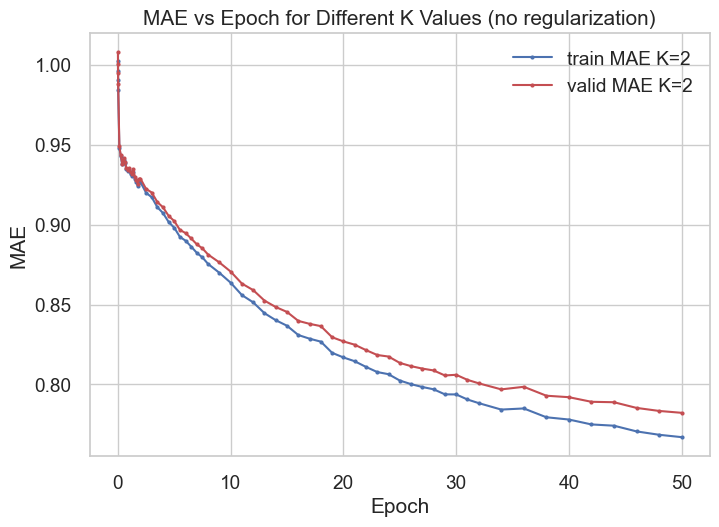

epoch       0.000 | loss_total     0.00301 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00289 | train_MAE     0.99549 | valid_MAE     1.00026 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00271 | train_MAE     0.98936 | valid_MAE     0.99361 | grad_wrt_mu     0.00151 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00273 | train_MAE     0.98431 | valid_MAE     0.98813 | grad_wrt_mu     0.00144 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00257 | train_MAE     0

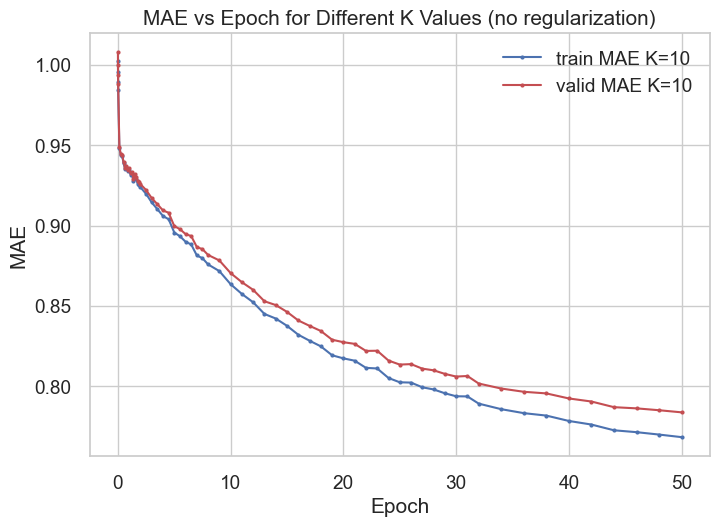

epoch       0.000 | loss_total     0.00298 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00293 | train_MAE     0.99557 | valid_MAE     1.00035 | grad_wrt_mu     0.00137 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00282 | train_MAE     0.99097 | valid_MAE     0.99535 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00268 | train_MAE     0.98522 | valid_MAE     0.98912 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00242 | train_MAE     0

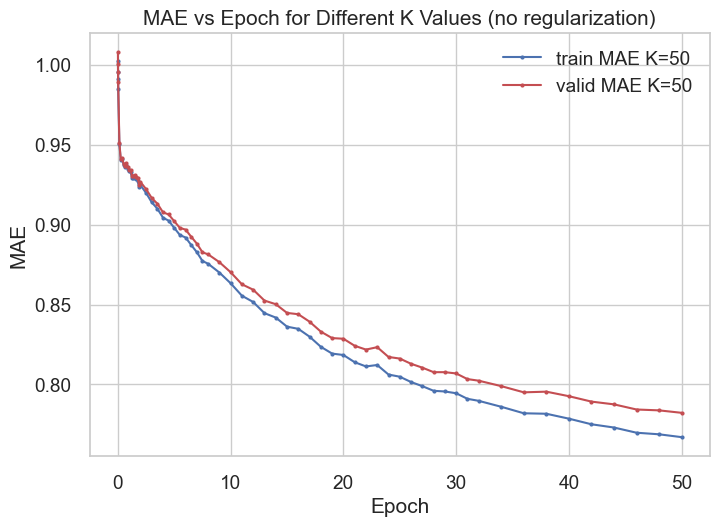

In [19]:
K_values = [2, 10, 50]
for K in K_values:
    model = CollabFilterOneVectorPerItem(
        n_epochs=50, batch_size=500, step_size=30,
        n_factors=K, alpha=0.0)
    model.init_parameter_dict(total_n_users, total_n_items, train_data_tuple)
    model.fit(train_data_tuple, valid_data_tuple)
    
    # Plot training and validation MAE
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b.-', label=f"train MAE K={K}")
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r.-', label=f"valid MAE K={K}")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()
    plt.title("MAE vs Epoch for Different K Values (no regularization)")
    plt.show()



epoch       0.000 | loss_total     0.00298 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00293 | train_MAE     0.99557 | valid_MAE     1.00035 | grad_wrt_mu     0.00137 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00282 | train_MAE     0.99097 | valid_MAE     0.99535 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00268 | train_MAE     0.98522 | valid_MAE     0.98912 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00242 | train_MAE     0

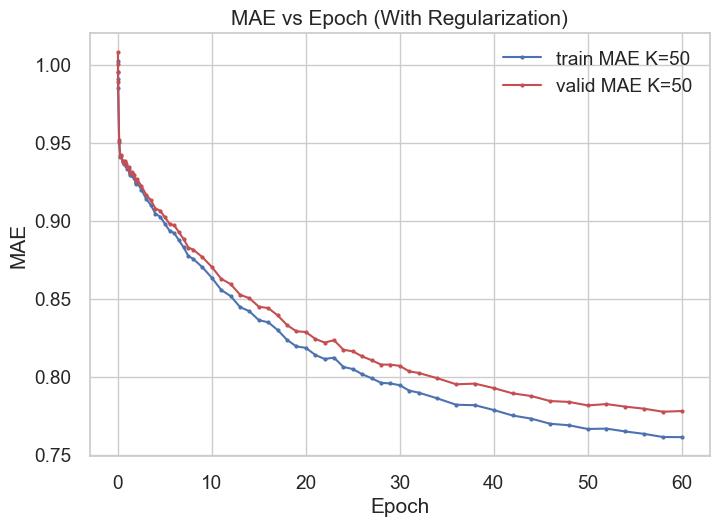

epoch       0.000 | loss_total     0.00300 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00296 | train_MAE     0.99557 | valid_MAE     1.00035 | grad_wrt_mu     0.00137 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00285 | train_MAE     0.99097 | valid_MAE     0.99535 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00271 | train_MAE     0.98522 | valid_MAE     0.98912 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00243 | train_MAE     0

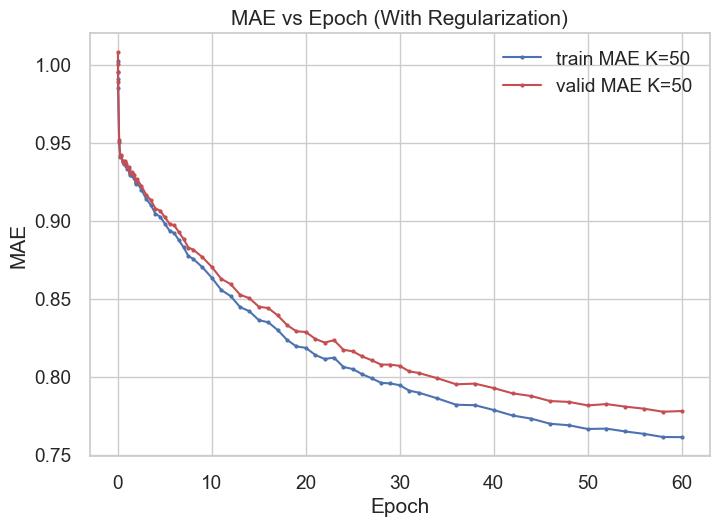

epoch       0.000 | loss_total     0.00324 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00314 | train_MAE     0.99557 | valid_MAE     1.00035 | grad_wrt_mu     0.00137 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00298 | train_MAE     0.99097 | valid_MAE     0.99535 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00280 | train_MAE     0.98522 | valid_MAE     0.98912 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00242 | train_MAE     0

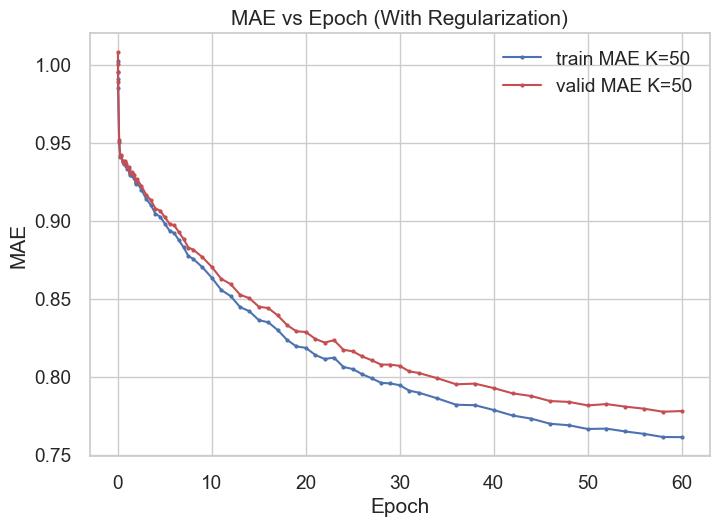

epoch       0.000 | loss_total     0.00560 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00211 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00003 | grad_wrt_V     0.00003
epoch       0.007 | loss_total     0.00304 | train_MAE     0.99557 | valid_MAE     1.00035 | grad_wrt_mu     0.00137 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.014 | loss_total     0.00283 | train_MAE     0.99097 | valid_MAE     0.99535 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00268 | train_MAE     0.98522 | valid_MAE     0.98912 | grad_wrt_mu     0.00136 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00242 | train_MAE     0

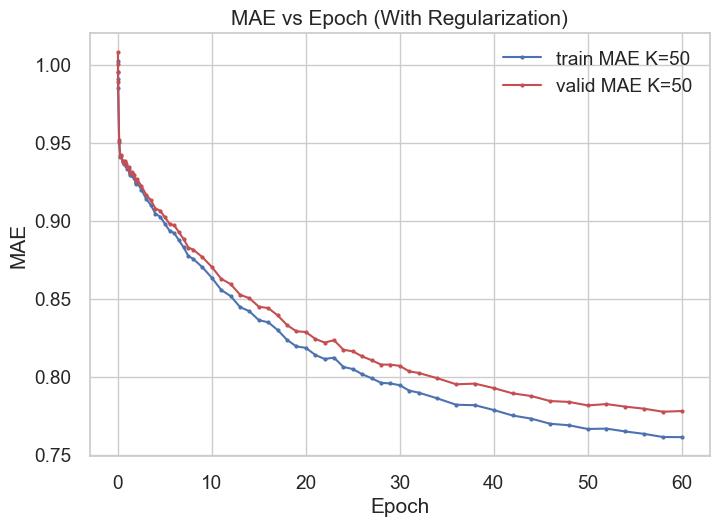

In [ ]:
alpha_values = [0.001, 0.1, 1, 10]
for a in alpha_values:
    model = CollabFilterOneVectorPerItem(
        n_epochs=60, batch_size=500, step_size=30,
        n_factors=50, alpha=a)
    model.init_parameter_dict(total_n_users, total_n_items, train_data_tuple)
    model.fit(train_data_tuple, valid_data_tuple)
    model.predict()
    
    # Plot training and validation MAE
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b.-', label=f"train MAE K={K}")
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r.-', label=f"valid MAE K={K}")
    plt.xlabel("Epoch")
    plt.ylabel("MAE")
    plt.legend()
    plt.title("MAE vs Epoch (With Regularization)")
    plt.show()

In [23]:
# Define parameter grid
K_values = [2, 10, 50]

# Results storage for best performance
best_results = []

# Perform grid search
for K in K_values:
    # Initialize the model with current K
    model = CollabFilterOneVectorPerItem(
        n_epochs=50, batch_size=500, step_size=10,
        n_factors=K, alpha=0.0
    )
    model.init_parameter_dict(total_n_users, total_n_items, train_data_tuple)
    
    # Fit the model
    model.fit(train_data_tuple, valid_data_tuple)
    
    # Store the best result for this K
    best_results.append({
        "K": K,
        "train_mae": model.trace_mae_train[-1],  # Final MAE on training set
        "valid_mae": model.trace_mae_valid[-1],  # Final MAE on validation set
    })

# Display results
print("Best Results for Each K:")
for res in best_results:
    print(f"K={res['K']}, Train MAE={res['train_mae']:.4f}, Valid MAE={res['valid_mae']:.4f}")


epoch       0.000 | loss_total     0.00318 | train_MAE     1.00261 | valid_MAE     1.00801 | grad_wrt_mu     0.00200 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.007 | loss_total     0.00302 | train_MAE     1.00038 | valid_MAE     1.00558 | grad_wrt_mu     0.00173 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00315 | train_MAE     0.99845 | valid_MAE     1.00349 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.021 | loss_total     0.00274 | train_MAE     0.99607 | valid_MAE     1.00090 | grad_wrt_mu     0.00187 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00280 | train_MAE     0